In [943]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import scipy.stats as ss
import time
%matplotlib inline

import math
from sklearn import linear_model
import statsmodels.formula.api as smf

import warnings
from IPython.display import display

from statsmodels.sandbox.regression.predstd import wls_prediction_std

warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="Using a"
)
def regstats (regr):
    print('Coefficients:\n{}\n'.format(lm.params))
    print('p-values:\n{}\n'.format(lm.pvalues))
    print('R-Squared:\n{}\n'.format(lm.rsquared))
    print('Confidence Interval:\n{}'.format(lm.conf_int()))
    prstd, iv_l, iv_u = wls_prediction_std(lm)
    plt.figure()
    plt.plot(iv_u[0:100], 'o', color='r')
    plt.plot(iv_l[0:100], 'o', color='r')
    plt.plot(lm.fittedvalues[0:100], 'o', color='b')
    plt.title('blue: predicted, red: 95% CI')
    plt.show()
    
def modelstats (lm):
    plt.figure()
    plt.hist(lm.resid)
    plt.title('Residual counts')
    plt.xlabel('Residual')
    plt.ylabel('Count')
    plt.show()
    plt.figure()
    plt.scatter(lm.predict(), lm.resid)
    plt.xlabel("Predicted")
    plt.ylabel("Residual")
    plt.axhline(y=0,color='red')
    plt.title('Predicted vs Residual')
    plt.show()
    regstats(lm)
    print("Residuals mean: {}".format(sum(lm.resid)/len(lm.resid)))


In [944]:
nyprop = pd.read_csv('newyorkproperty.csv')
nyprop.shape

(60295, 62)

In [945]:
nyprop.dtypes

borough_code                                        int64
borough_code_definition                            object
neighborhood                                       object
building_class_category_code                       object
building_class_category_code_definition            object
tax_class_at_present_code                          object
tax_class_at_present_code_definition               object
building_class_at_present_code                     object
building_class_at_present_code_definition          object
address                                            object
apartment_number                                   object
zipcode                                             int64
residential_units                                 float64
commercial_units                                  float64
total_units                                       float64
land_square_feet                                  float64
gross_square_feet                                 float64
year_built    

In [946]:
nyprop.describe()

,borough_code,zipcode,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale_code,sale_price,...,assessed_value_total,exempt_value_land,exempt_value_total,year_altered_one,year_altered_two,maximum_allowable_residential_far,maximum_allowable_commercial_far,maximum_allowable_facility_far,x_coordinate,y_coordinate
count,60295.000000,60295.000000,51800.000000,4063.000000,55748.000000,4.158000e+04,4.033300e+04,56392.000000,60295.000000,4.138000e+04,...,5.877900e+04,2.899600e+04,3.140100e+04,7680.000000,1077.000000,58418.000000,9573.000000,59818.000000,5.760900e+04,57609.000000
mean,3.125682,10892.267700,2.460270,2.028550,2.472376,4.031877e+03,4.107047e+03,1950.225865,1.557741,1.599330e+06,...,5.457912e+06,2.478981e+05,2.011400e+06,1997.623437,2006.251625,2.505188,5.421122,3.337158,1.002762e+06,194620.757000
std,1.237895,568.654447,10.402452,6.054176,10.218520,2.365167e+04,2.607770e+04,36.933528,0.842635,1.314434e+07,...,1.894986e+07,1.997356e+06,9.373219e+06,14.680213,8.675201,2.722832,4.271232,2.903835,2.989883e+04,29463.222056
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.300000e+01,1.000000e+00,1111.000000,1.000000,1.000000e+00,...,1.600000e+01,2.000000e+00,2.000000e+00,1908.000000,1930.000000,0.500000,0.500000,1.000000,9.132830e+05,121099.000000
25%,2.000000,10312.000000,1.000000,1.000000,1.000000,2.000000e+03,1.408000e+03,1920.000000,1.000000,4.650000e+05,...,2.436400e+04,1.550000e+03,1.550000e+03,1987.000000,2003.000000,0.600000,2.000000,1.000000,9.878840e+05,171657.000000
50%,3.000000,11213.000000,1.000000,1.000000,1.000000,2.500000e+03,1.975000e+03,1940.000000,1.000000,7.120000e+05,...,3.669700e+04,6.551000e+03,1.416000e+04,2002.000000,2007.000000,1.250000,3.400000,2.000000,1.000541e+06,194375.000000
75%,4.000000,11356.000000,2.000000,2.000000,2.000000,4.000000e+03,2.802000e+03,1983.000000,2.000000,1.200000e+06,...,1.077480e+06,6.489050e+04,2.523740e+05,2008.000000,2013.000000,3.000000,10.000000,4.800000,1.024256e+06,215187.000000
max,5.000000,11697.000000,917.000000,184.000000,917.000000,3.014056e+06,2.224200e+06,2017.000000,4.000000,2.210000e+09,...,5.007303e+08,1.687136e+08,4.033876e+08,2017.000000,2016.000000,12.000000,15.000000,15.000000,1.067141e+06,271831.000000


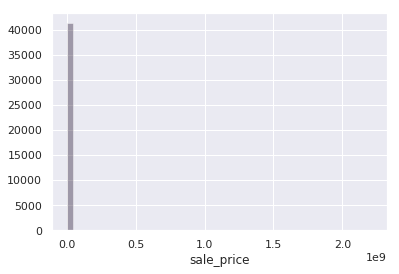

In [947]:
sns.set(style='darkgrid',palette='mako')

ax = sns.distplot(nyprop.sale_price.dropna(),kde=False)

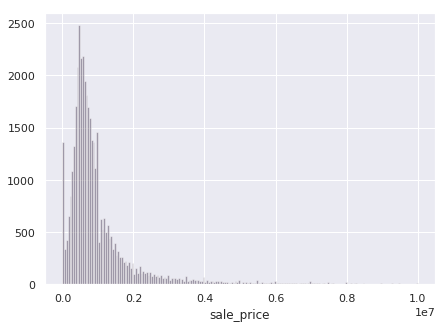

In [948]:
nyprop = nyprop.loc[(nyprop['sale_price']<=10000000)&(nyprop.sale_price>=0)]
plt.figure(figsize=(7,5))
ax = sns.distplot(nyprop.sale_price.dropna(),bins=200,kde=False)
plt.show()


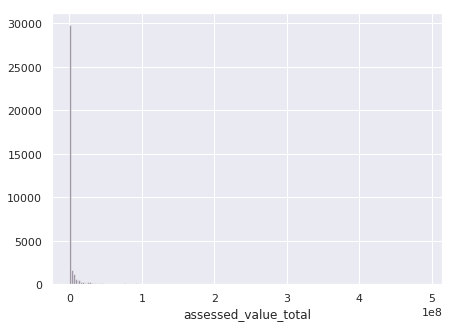

In [949]:
nyprop = nyprop.loc[(nyprop['sale_price']<=6000000)&(nyprop.sale_price>=50000)]
plt.figure(figsize=(7,5))
ax = sns.distplot(nyprop.assessed_value_total.dropna(),bins=200,kde=False)
plt.show()

In [950]:
nyprop.assessed_value_total.describe()

count    3.759800e+04
mean     5.471916e+06
std      1.820399e+07
min      4.300000e+01
25%      2.364400e+04
50%      3.483600e+04
75%      1.289250e+06
max      4.903758e+08
Name: assessed_value_total, dtype: float64

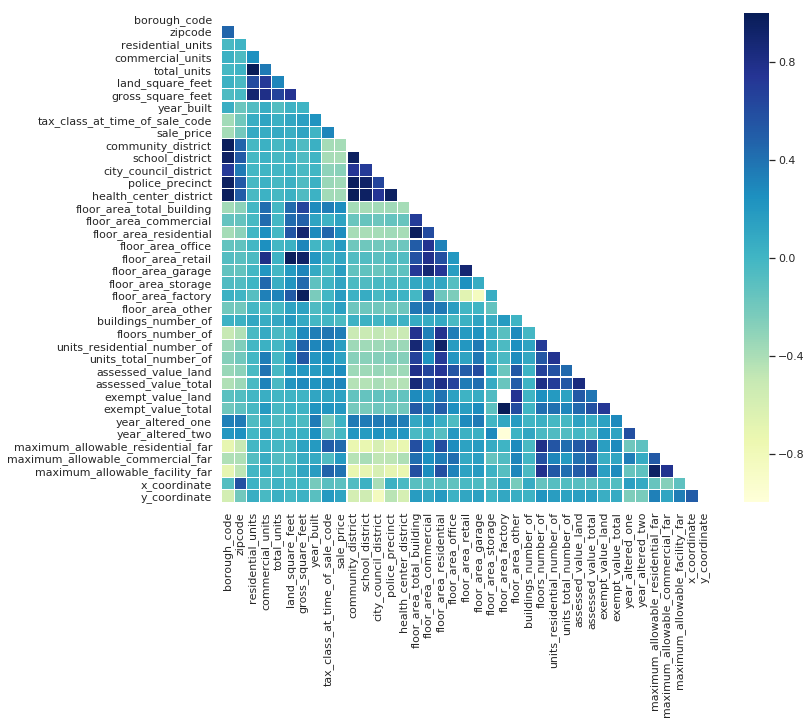

In [951]:
corrmat = nyprop.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
    
with sns.axes_style('white'):    
    ax = plt.subplots(figsize=(12,9))

    sns.heatmap(corrmat,
            vmax=1, 
            cmap="YlGnBu",
            #annot=True,
            linewidth=.05,
            square=True,
            mask=mask)


plt.show()

In [952]:
nyprop['dif'] = nyprop.assessed_value_total-nyprop.sale_price

In [953]:
#sample = nyprop.loc[(nyprop['dif']<=100000000)&(nyprop['dif']>0)]

In [954]:
nyprop.dif.describe()

count    3.759800e+04
mean     4.499253e+06
std      1.795846e+07
min     -5.911498e+06
25%     -7.777480e+05
50%     -4.706860e+05
75%      5.308435e+05
max      4.849258e+08
Name: dif, dtype: float64

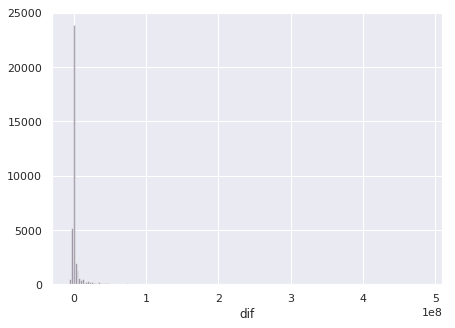

In [955]:
plt.figure(figsize=(7,5))
ax = sns.distplot(nyprop.dif.dropna(),bins=200,kde=False)
plt.show()

In [956]:
nyprop = nyprop.loc[nyprop.assessed_value_total<6000000]

In [957]:
nyprop = nyprop.loc[nyprop.dif < 6000000]
nyprop.describe()

,borough_code,zipcode,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale_code,sale_price,...,exempt_value_land,exempt_value_total,year_altered_one,year_altered_two,maximum_allowable_residential_far,maximum_allowable_commercial_far,maximum_allowable_facility_far,x_coordinate,y_coordinate,dif
count,32289.000000,32289.000000,28673.000000,1755.00000,29550.000000,25360.000000,24845.000000,31014.000000,32289.000000,3.228900e+04,...,1.495900e+04,1.567700e+04,3419.000000,494.000000,31651.000000,2311.000000,32205.000000,3.148500e+04,31485.000000,3.228900e+04
mean,3.432965,10982.513116,1.855230,1.45641,1.892115,3240.171964,2349.689475,1946.618366,1.352256,8.564332e+05,...,3.433901e+04,2.174936e+05,1998.354197,2007.253036,1.618186,3.507356,2.414646,1.004607e+06,191968.245863,-3.571124e+05
std,1.068097,503.771906,3.728753,1.45032,3.727567,5088.618753,4115.064004,34.913208,0.664741,7.508980e+05,...,9.773884e+04,6.773408e+05,14.147907,7.595687,1.482067,2.428590,1.708836,3.274894e+04,31051.050268,1.383919e+06
min,1.000000,0.000000,1.000000,1.00000,1.000000,33.000000,120.000000,1800.000000,1.000000,5.000000e+04,...,2.000000e+00,2.000000e+00,1910.000000,1964.000000,0.500000,0.500000,1.000000,9.132830e+05,121099.000000,-5.911498e+06
25%,3.000000,10462.000000,1.000000,1.00000,1.000000,2000.000000,1352.000000,1920.000000,1.000000,4.500000e+05,...,1.550000e+03,1.550000e+03,1987.000000,2004.000000,0.600000,2.000000,1.000000,9.886380e+05,168440.000000,-8.427600e+05
50%,4.000000,11219.000000,1.000000,1.00000,1.000000,2500.000000,1829.000000,1935.000000,1.000000,6.500000e+05,...,3.380000e+03,4.984000e+03,2002.000000,2008.000000,0.900000,3.400000,2.000000,1.006925e+06,189305.000000,-5.409480e+05
75%,4.000000,11365.000000,2.000000,1.00000,2.000000,3896.250000,2508.000000,1965.000000,2.000000,9.650000e+05,...,1.414750e+04,3.304000e+04,2010.000000,2014.000000,2.430000,4.000000,3.000000,1.028199e+06,211277.000000,-3.104230e+05
max,5.000000,11697.000000,286.000000,25.00000,286.000000,354000.000000,334581.000000,2017.000000,4.000000,6.000000e+06,...,2.807550e+06,5.949000e+06,2016.000000,2016.000000,12.000000,15.000000,15.000000,1.067141e+06,271831.000000,5.905602e+06


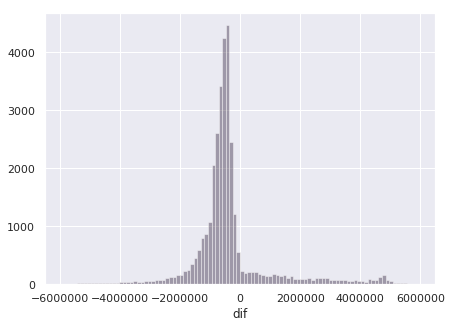

In [958]:
plt.figure(figsize=(7,5))
ax = sns.distplot(nyprop.dif.dropna(),bins=100,kde=False)
plt.show()

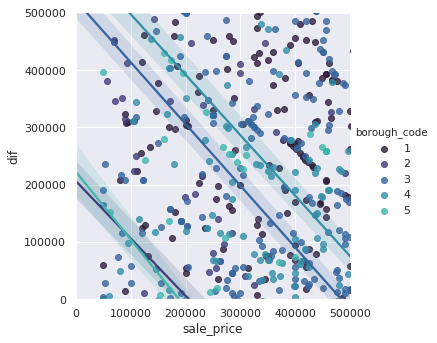

In [959]:
ax = sns.lmplot(x='sale_price',y='dif',hue='borough_code',data=nyprop)
plt.ylim(0,500000)
plt.xlim(0,500000)
plt.show()

In [960]:
model = nyprop.select_dtypes(include=(float,int))
model.isnull().sum()

borough_code                             0
zipcode                                  0
residential_units                     3616
commercial_units                     30534
total_units                           2739
land_square_feet                      6929
gross_square_feet                     7444
year_built                            1275
tax_class_at_time_of_sale_code           0
sale_price                               0
community_district                       0
school_district                          5
city_council_district                    9
police_precinct                          8
health_center_district                   5
floor_area_total_building              734
floor_area_commercial                28040
floor_area_residential                1560
floor_area_office                    31185
floor_area_retail                    30210
floor_area_garage                    31273
floor_area_storage                   31877
floor_area_factory                   32168
floor_area_

In [961]:
model = model.drop(['residential_units','commercial_units','total_units','land_square_feet',
 'gross_square_feet','floor_area_commercial','floor_area_office',
 'floor_area_retail', 'floor_area_garage', 'floor_area_storage',
 'floor_area_factory', 'floor_area_other', 'assessed_value_land',
 'exempt_value_land', 'x_coordinate', 'y_coordinate', 'year_altered_one',
 'year_altered_two'], axis=1)

dropnalist = ['year_built', 'community_district','school_district','city_council_district',
 'police_precinct', 'health_center_district', 'floor_area_total_building','floor_area_residential',
 'buildings_number_of', 'assessed_value_total']

zeros = ['exempt_value_total','maximum_allowable_residential_far',
         'maximum_allowable_commercial_far','maximum_allowable_facility_far']
for col in dropnalist:
    model = model.loc[model[col]>0]
for col in zeros:
    model[col] = model[col].fillna(0)

model.floors_number_of = model.floors_number_of.fillna(1)

model.isnull().sum()

borough_code                         0
zipcode                              0
year_built                           0
tax_class_at_time_of_sale_code       0
sale_price                           0
community_district                   0
school_district                      0
city_council_district                0
police_precinct                      0
health_center_district               0
floor_area_total_building            0
floor_area_residential               0
buildings_number_of                  0
floors_number_of                     0
units_residential_number_of          0
units_total_number_of                0
assessed_value_total                 0
exempt_value_total                   0
maximum_allowable_residential_far    0
maximum_allowable_commercial_far     0
maximum_allowable_facility_far       0
dif                                  0
dtype: int64

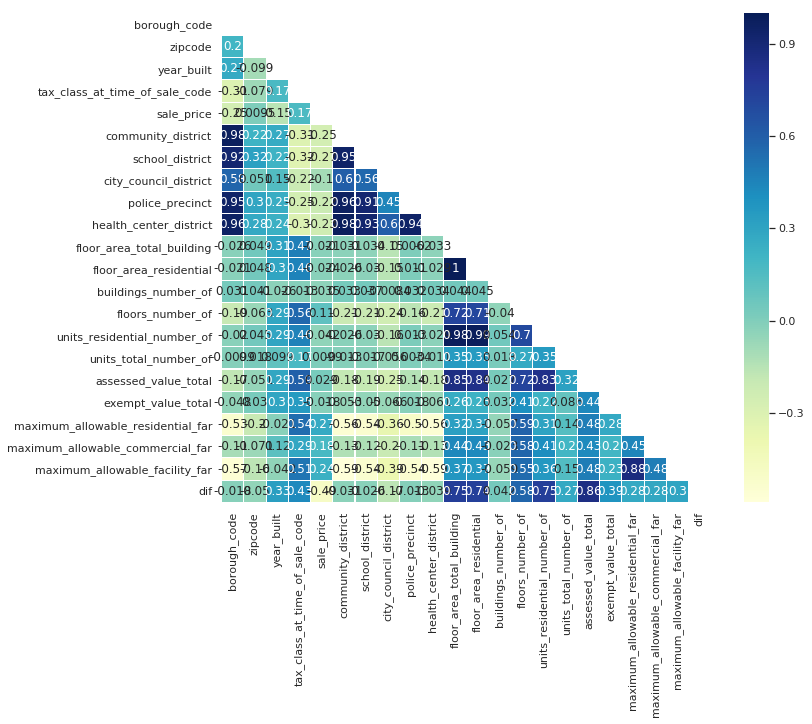

In [962]:
corrmat = model.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
    
with sns.axes_style('white'):    
    ax = plt.subplots(figsize=(12,9))

    sns.heatmap(corrmat,
            vmax=1, 
            cmap="YlGnBu",
            annot=True,
            linewidth=.05,
            square=True,
            mask=mask)


plt.show()

In [963]:
#set up and fit the model to the data

regr = linear_model.LinearRegression()
Y = model['dif']
X = model.drop(['dif','sale_price'], axis=1)
regr.fit(X, Y)

print('\nCoefficients: \n',regr.coef_)
print('\nIntercept: \n',regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coefficients: 
 [ 1.39774103e+05 -9.83928199e+01  1.68918218e+03 -1.43708832e+05
  3.87175175e+03  3.12430881e+04 -1.13155389e+04 -1.56947997e+04
 -1.55074396e+04 -8.82747457e+00  9.70265160e-01 -4.30442112e+02
 -4.37262432e+03  1.07288725e+04 -2.22684585e+01  9.95580445e-01
  1.70624344e-01 -6.31081322e+04 -1.35071161e+05  1.43801406e+04]

Intercept: 
 -3010867.1246458073

R-squared:
0.7838552595408093


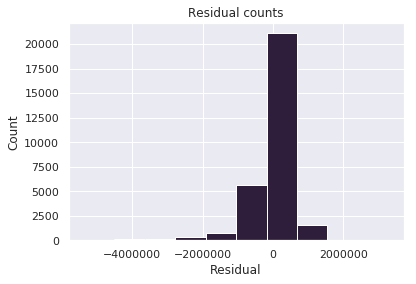

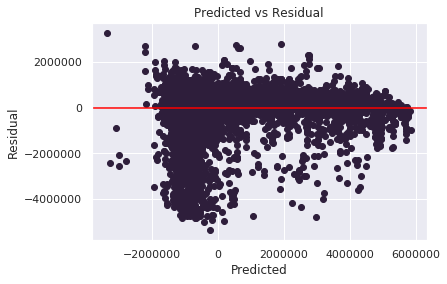

Coefficients:
Intercept                           -1.837107e+06
year_built                           1.760812e+03
borough_code                         1.282996e+05
zipcode                             -2.048587e+02
assessed_value_total                 1.017384e+00
community_district                  -2.700074e+03
school_district                      3.623172e+04
city_council_district               -5.019035e+03
tax_class_at_time_of_sale_code      -1.688364e+05
exempt_value_total                   1.159596e-01
units_total_number_of               -9.713016e+00
floor_area_total_building            2.467683e+00
maximum_allowable_residential_far   -9.184828e+04
maximum_allowable_commercial_far    -1.261684e+05
maximum_allowable_facility_far       1.878110e+04
dtype: float64

p-values:
Intercept                             2.333498e-11
year_built                            2.190044e-44
borough_code                          2.115801e-13
zipcode                              5.215702e-122
assess

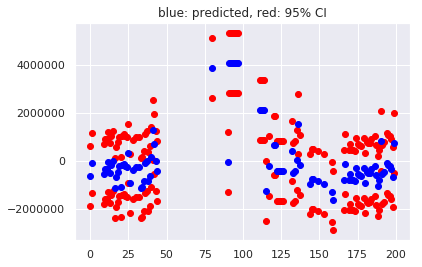

Residuals mean: 1.0220066782816418e-07


In [964]:
lform = 'dif ~ year_built+borough_code+zipcode+assessed_value_total+community_district+school_district+city_council_district+tax_class_at_time_of_sale_code+exempt_value_total+units_total_number_of+floor_area_total_building+maximum_allowable_residential_far+maximum_allowable_commercial_far+maximum_allowable_facility_far'
lm = smf.ols(formula=lform, data=model).fit()
modelstats(lm)

In [965]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=1)
X = model.drop(['dif','sale_price'], axis=1)
Y = model['dif']
knn.fit(X, Y)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [966]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=500, weights='distance')
X = model.drop(['dif','sale_price'], axis=1)
Y = model['dif']
knn_w.fit(X, Y)

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.67 (+/- 0.26)
Weighted Accuracy: 0.79 (+/- 0.18)


In [967]:
k = []
scores = []
times = []
for i in range(1,21):
    start = time.time()
    knn_w = neighbors.KNeighborsRegressor(n_neighbors=i+2*i, weights='distance')
    X = model.drop(['dif','sale_price'], axis=1)
    Y = model['dif']
    knn_w.fit(X, Y)
    score_w = cross_val_score(knn_w, X, Y, cv=5)
    scores.append(score_w.mean())
    k.append(i+2*i)
    stop = time.time()
    ktime = stop-start
    times.append(ktime)
    


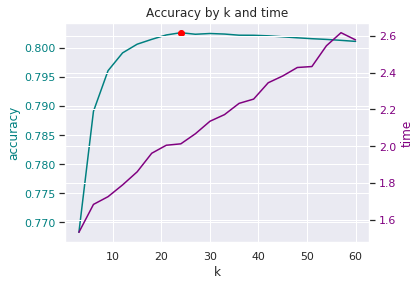

Maximum accuracy 0.8026, k = 24.00


In [981]:
x = np.array(k)
y0 = np.array(scores)
y1 = np.array(times)
n_max = y0.argmax()
point = [x[7],y0.max()]

fig, ax1 = plt.subplots()

ax1.set_xlabel('k')
ax1.set_ylabel('accuracy', color='teal')
ax1.plot(x,y0 , color='teal')
ax1.tick_params(axis='y', labelcolor='teal')
plt.plot(point[0],point[1],'o',color='r')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'purple'
ax2.set_ylabel('time', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y1, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Accuracy by k and time')
plt.show()
print('Maximum accuracy {0:.4f}, k = {1:.2f}'.format(y0.max(),x[n_max]))

R-squared PLSR: 0.7805256234974639


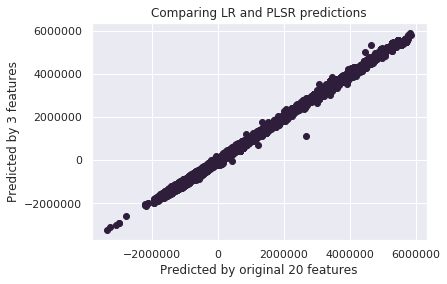

In [969]:
from sklearn.cross_decomposition import PLSRegression
pls1 = PLSRegression(n_components=7)

# Reduce X to R(X) and regress on y.
pls1.fit(X, Y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, Y))

Y_pred = lm.predict(X)

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original {} features'.format(X.shape[1]))
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

This data set was pretty tough. There is a lot of noise with certain properties, more time could be spent analyzing the data. For the regressions i created a feature assessed_value_total - sale_price. With this difference, a certain discount is generated based on other characteristics of the property. The model was used to predict this discount.
The ols model was quick. But the KNN regression got slightly more accurate as the number of neighbors increased. A few other notebooks were dedicated to attempting to transform the data to a more normal distributions and ttests to test whether certain categorical features we significantly different. one advantage of the ols model is that the pvalues for each coefficient can help determine what is significant